<a href="https://colab.research.google.com/github/janpeter19/CONF_2023_10_MODELICA15/blob/main/BPL_YEAST_COB_Batch_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BPL_YEAST_COB_Batch script with PyFMI

The key library PyFMI is installed.

After the installation a small application BPL_YEAST_COB_Batch is loaded and run. You can continue with this example if you like.

In [1]:
!lsb_release -a # Actual VM Ubuntu version used by Google

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 22.04.4 LTS
Release:	22.04
Codename:	jammy


In [2]:
%env PYTHONPATH=

env: PYTHONPATH=


In [3]:
!python --version

Python 3.11.11


In [4]:
!wget https://repo.anaconda.com/miniconda/Miniconda3-py311_24.11.1-0-Linux-x86_64.sh
!chmod +x Miniconda3-py311_24.11.1-0-Linux-x86_64.sh
!bash ./Miniconda3-py311_24.11.1-0-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.11/site-packages/')

--2025-03-27 08:38:47--  https://repo.anaconda.com/miniconda/Miniconda3-py311_24.11.1-0-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.191.158, 104.16.32.241, 2606:4700::6810:20f1, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.191.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 145900576 (139M) [application/octet-stream]
Saving to: ‘Miniconda3-py311_24.11.1-0-Linux-x86_64.sh’

Miniconda3-py311_24 100%[===================>] 139.14M   139MB/s    in 1.0s    

2025-03-27 08:38:48 (139 MB/s) - ‘Miniconda3-py311_24.11.1-0-Linux-x86_64.sh’ saved [145900576/145900576]

PREFIX=/usr/local
Unpacking payload ...

Installing base environment...

Preparing transaction: ...working... done
Executing transaction: ...working... done
installation finished.


In [5]:
!conda update -n base -c defaults conda --yes

Channels:
 - defaults
Platform: linux-64
Solving environment: | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2025.2.25  |       h06a4308_0         129 KB
    certifi-2025.1.31          |  py311h06a4308_0         163 KB
    openssl-3.0.16             |       h5eee18b_0         5.2 MB
    ------------------------------------------------------------
                                           Total:         5.5 MB

The following packages will be UPDATED:

  ca-certificates                     2024.11.26-h06a4308_0 --> 2025.2.25-h06a4308_0 
  certifi                         2024.8.30-py311h06a4308_0 --> 2025.1.31-py311h06a4308_0 
  openssl                                 3.0.15-h5eee18b_0 --> 3.0.16-h5eee18b_0 



openssl-3.0.16       | 5.2 MB    | :   0% 0/1 [00:00<?,

In [6]:
!conda --version
!python --version

conda 24.11.1
Python 3.11.11


In [7]:
!conda config --set channel_priority strict

In [8]:
!conda install -c conda-forge pyfmi --yes # Install the key package

Channels:
 - conda-forge
 - defaults
Platform: linux-64
Solving environment: / - \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - pyfmi


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _x86_64-microarch-level-3  |      2_broadwell           8 KB  conda-forge
    assimulo-3.6.0             |  py311h083bc19_0         1.1 MB  conda-forge
    certifi-2025.1.31          |     pyhd8ed1ab_0         159 KB  conda-forge
    conda-25.3.0               |  py311h38be061_0         1.1 MB  conda-forge
    fmilib-2.4.1               |       hac33072_1         383 KB  conda-forge
    gmp-6.3.0                  |       hac33072_2         449 KB  conda-forge
    libamd-3.3.3               | haaf9dc3_7100102          49 KB  conda-forge
    libblas-3.9.0              |31_h59b9bed_openblas          16 KB  conda-forge
    libbtf-2.3.2               

In [9]:
!pip install optlang

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 46.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 101.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 20.5 MB/s eta 0:00:00


# Notes YEAST_COB_Batch constraint-based approach

Now specific installation and the run simulations. Start with connecting to Github. Then upload the two files:

* FMU - BPL_YEAST_AIR_Fedbatch_linux_jm_cs.fmu
* Setup-file - BPL_YEAST_AIR_Fedbatch_explore

In [10]:
%%bash
git clone https://github.com/janpeter19/CONF_2023_10_MODELICA15

Cloning into 'CONF_2023_10_MODELICA15'...


In [11]:
%cd CONF_2023_10_MODELICA15

/content/CONF_2023_10_MODELICA15


In [12]:
run -i BPL_YEAST_COB_Batch_explore.py

Linux - run FMU pre-compiled OpenModelica

Model for the process has been setup. Key commands:
 - par()       - change of parameters and initial values
 - init()      - change initial values only
 - simu()      - simulate and plot
 - newplot()   - make a new plot
 - show()      - show plot from previous simulation
 - disp()      - display parameters and initial values from the last simulation
 - describe()  - describe culture, broth, parameters, variables with values/units

Note that both disp() and describe() takes values from the last simulation
and the command process_diagram() brings up the main configuration

Brief information about a command by help(), eg help(simu)
Key system information is listed with the command system_info()


In [13]:
plt.rcParams['figure.figsize'] = [20/2.54, 16/2.54]

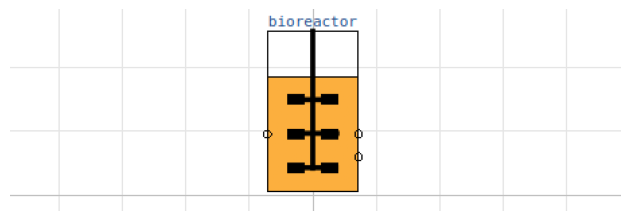

In [14]:
process_diagram()

## Try using LP in each step

In [15]:
from optlang import Model, Variable, Constraint, Objective

In [16]:
# Define culture constraint-based model
def culture(G, E):

    # LP calculation of the optimal qGr, qEr based on G and E values

    # - parameters
    qO2max = 6.9e-3; kog = 2.3; koe = 1.6; YGr = 3.5; YEr = 1.32;
    alpha = 0.01; beta = 1.0

    # - transfer data from dynamic reactor model to static LP model
    qGr_opt = Variable('qGr_opt', lb=0)
    qEr_opt = Variable('qEr_opt', lb=0)

    # - LP model constraint and objective
    mu_max = Objective(YGr*qGr_opt + YEr*qEr_opt, direction='max')
    qO2lim = Constraint(kog*qGr_opt + koe*qEr_opt, ub=qO2max)
    qGlim = Constraint(qGr_opt, ub=alpha*max(0,G))
    qElim = Constraint(qEr_opt, ub=beta*max(0,E))

    # - put together the LP model
    yeast_model = Model(name='Yeast bottleneck model')
    yeast_model.objective = mu_max
    yeast_model.add(qO2lim)
    yeast_model.add(qGlim)
    yeast_model.add(qElim)

    # - do LP optimization
    yeast_model.optimize()

    return (yeast_model.objective.value, yeast_model.variables.qGr_opt.primal, yeast_model.variables.qEr_opt.primal, qO2lim.primal)

In [17]:
# Initialization
V_0=1.0
init(V_0=V_0, VX_0=V_0*2.0, VG_0=V_0*10, VE_0=3.0)

In [18]:
# Loop of simulations
t_final = 8.0
t_samp = 0.0333
n_samp = t_final/t_samp + 1

Could not find cannot import name 'dopri5' from 'assimulo.lib' (/usr/local/lib/python3.11/site-packages/assimulo/lib/__init__.py)
Could not find cannot import name 'rodas' from 'assimulo.lib' (/usr/local/lib/python3.11/site-packages/assimulo/lib/__init__.py)
Could not find cannot import name 'odassl' from 'assimulo.lib' (/usr/local/lib/python3.11/site-packages/assimulo/lib/__init__.py)
Could not find ODEPACK functions.
Could not find RADAR5
Could not find GLIMDA.


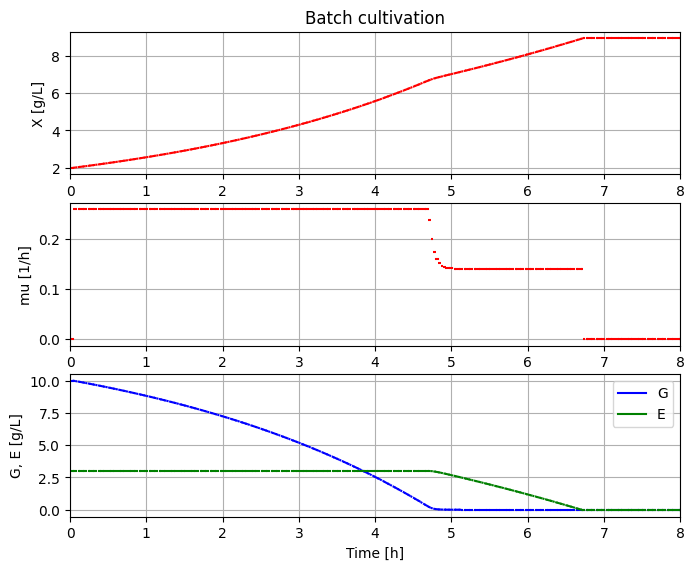

In [19]:
# Simulate n sample steps
newplot(title='Batch cultivation', plotType='TimeSeries2')
ax1.set_xlim([0, t_final]); ax2.set_xlim([0, t_final]); ax3.set_xlim([0, t_final])

simu(t_samp, options=opts_fast)
for i in range(int(n_samp)):
    (mum_opt, qGr_opt, qEr_opt, qO2_opt) = culture(sim_res['bioreactor.c[2]'][-1], sim_res['bioreactor.c[3]'][-1])
    par(mum=mum_opt, qGr=qGr_opt, qEr=qEr_opt, qO2=qO2_opt)
    simu(t_samp, 'cont', options=opts_fast)

In [20]:
describe('MSL')

MSL: 3.2.3 - used components: none


In [21]:
system_info()


System information
 -OS: Linux
 -Python: 3.11.11
 -Scipy: not installed in the notebook
 -PyFMI: 2.16.3
 -FMU by: OpenModelica Compiler OpenModelica 1.21.0
 -FMI: 2.0
 -Type: FMUModelME2
 -Name: BPL_YEAST_COB.Batch
 -Generated: 2023-05-31T09:43:28Z
 -MSL: 3.2.3
 -Description: Bioprocess Library version 2.1.1
 -Interaction: FMU-explore version 0.9.8


In [22]:
!conda list optlang

# packages in environment at /usr/local:
#
# Name                    Version                   Build  Channel
optlang                   1.8.3                    pypi_0    pypi
